<a href="https://colab.research.google.com/github/BrendaChepkoech/Hypothyroidism-Project/blob/main/Brenda_Chepkoech%2Cweek_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroidism Project

## 1. Defining the Question

### a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

Being able to build an accurate model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees

Part 2: Support Vector Machine(SVM)

### c) Understanding the context 

Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.
Nairobi Hospital conducted a clinical camp to test for hypothyroidism.The data collected focused on Thyroid patients. 

- The Levothyroxine (T4) and Triiodothyronine (T3) hormones are produced by the thyroid gland and they play major role in converting nutrients into energy and thereby help in regulating body temperature, brain function and even the heart rate.
- The amount of T3 and T4 hormones in the blood is controlled by the Thyroid Stimulating Hormone (TSH). 
- There are different thyroid function tests such as TSH, T3, T4U, Total T4 and Free T4 Index (FTI) that are done to assess the various functions related to the thyroid gland. 
- A low TSH and low T4 indicate secondary hypothyroidism while a high TSH and low T4 indicate primary hypothyroidism. 
- T3 tests are used for determining the severity of the hyperthyroidism or to diagnose the hyperthyroidism.

### d) Recording the Experimental Design

- Import the relevant libraries that we will use in our analysis
- Read and explore the dataset we will use for our project
- Find and deal with anomalies, and missing data within the dataset. 
- Perform univariate, bivariate and multivariate analysis recording your observations.
- Implement the solution by building models that can predict whether a patient has hypothyroidism or not.
- For this section, we will build a model using the advanced decision trees such as Ada boost and/or the Gradient boosted trees and afterwards evaluate their performance
- Also, apply Polynomial, sigmoid and rbf kernel functions to build your SVM model and then evaluate their performance
- Give recommendations on which model is the best in predicting whether a person has hypothyroidism or not.

### e) Data Relevance

The data is relevant since we have all the features that will help us predict whether a patient has hyperthyrodism or not

Dataset link http://bit.ly/hypothyroid_data

**Dataset Columns**

Age

Sex

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4

## 2. Reading the Data

In [191]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [152]:
# Loading the Dataset
df=pd.read_csv("/content/hypothyroid.csv")


## 3. Checking the Data

In [153]:
# Determining the no. of records in our dataset
#
df.shape

(3163, 26)

In [154]:
# Previewing the top of our dataset
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [155]:
# Previewing the bottom of our dataset
# 
df.tail(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [156]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [157]:
#column names
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

## 5. Tidying the Dataset

In [158]:
# Checking for duplicates
#
df.duplicated().sum()
#We shall drop duplicates

77

In [159]:
#dropping dupicates
df.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [160]:
# Checking for Anomalies
#
df[['status','age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']].nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [161]:
#After exploring the data I realized that there are some "?" in some columns
#we shall replace the ? with NaN so that it can read null values
df.replace("?",np.NaN,inplace=True)

In [162]:
# Identifying the Missing Data
#
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Text(0.5, 1.0, 'Missing Values')

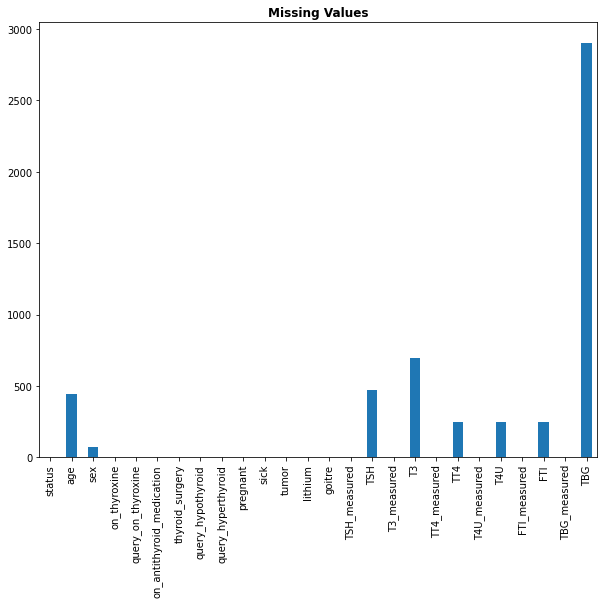

In [163]:
#Lets vizualize the missing values
plt.figure(figsize=(10,8))
df.isnull().sum().plot(kind="bar")
plt.title("Missing Values",weight="bold")

In [164]:
#drop the 'TBG' column because it has alot of missing values(almost 90% of the data is null)
#I also dropped TBG_measured because it relates to 'TBG' 
df.drop(['TBG_measured','TBG'],1, inplace=True)

In [165]:
#while checking the data, i realized that the data type object 
#We shall convert the numerical columns to numerical
#numerical_columns = df['age','TSH','T3','T4U','FTI','TT4']
df["age"]=pd.to_numeric(df["age"])
df['TSH']=pd.to_numeric(df['TSH'])
df['TT4']=pd.to_numeric(df['TT4'])
df['T3']=pd.to_numeric(df['T3'])
df['FTI']=pd.to_numeric(df['FTI'])
df['T4U']=pd.to_numeric(df['T4U'])

In [166]:
#filiing the null values with mode for categorical and median for numerical
#columns with null values = ['age', 'sex', 'TSH',"T3",'T4U', 'FTI', 'TT4']
df['age'].fillna(df['age'].median(),inplace=True)
df['sex'].fillna(df['sex'].mode()[0],inplace=True)
df['TSH'].fillna(df['TSH'].median(),inplace=True)
df["T3"].fillna(df["T3"].median(),inplace=True)
df['T4U'].fillna(df['T4U'].median(),inplace=True)
df['FTI'].fillna(df['FTI'].median(),inplace=True)
df['TT4'].fillna(df['TT4'].median(),inplace=True)

In [167]:
#confirming that there are no null values
df.isnull().sum().sum()

0

## 6. Exploratory Analysis

## Univariate Analysis

In [168]:
#categorical variables
#Frquecy table for status
df["status"].value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [169]:
#Frequency table for  sex
df["sex"].value_counts()

F    2255
M     908
Name: sex, dtype: int64

In [170]:
#Frequency table for  on_thyroxine
df["on_thyroxine"].value_counts()

f    2702
t     461
Name: on_thyroxine, dtype: int64

In [171]:
#Frequency table for goitre
df["goitre"].value_counts()

f    3064
t      99
Name: goitre, dtype: int64

In [172]:
#Frequency table for TSH_measured
df["TSH_measured"].value_counts()

y    2695
n     468
Name: TSH_measured, dtype: int64

In [173]:
#Frequency table for T3_measured
df["T3_measured"].value_counts()

y    2468
n     695
Name: T3_measured, dtype: int64

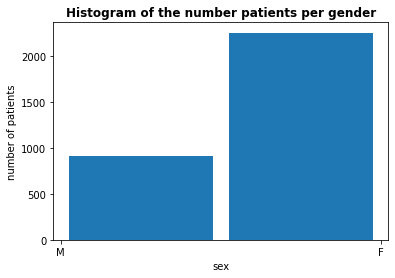

In [174]:
#Histogram for sex of the patients who went to the hospital
sex=df["sex"]
plt.hist(sex,histtype='bar',bins=2, rwidth=0.9)
plt.xlabel("sex")
plt.ylabel("number of patients")
plt.title('Histogram of the number patients per gender',weight="bold")
plt.show()

There were more female patients than male patients. 

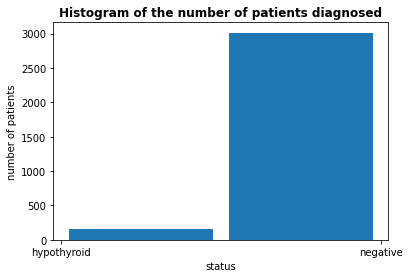

In [89]:
#Histogram for status of whether a patient was diagnosed with or not
status=df["status"]
plt.hist(status,histtype='bar',bins=2, rwidth=0.9)
plt.xlabel("status")
plt.ylabel("number of patients")
plt.title('Histogram of the number of patients diagnosed',weight="bold")
plt.show()


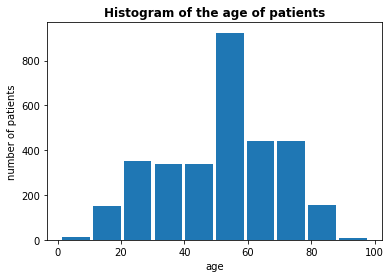

In [90]:
#Histogram for status of whether a patient was diagnosed with or not
age=df["age"]
plt.hist(age,histtype='bar',bins=10, rwidth=0.9)
plt.xlabel("age")
plt.ylabel("number of patients")
plt.title('Histogram of the age of patients',weight="bold")
plt.show()

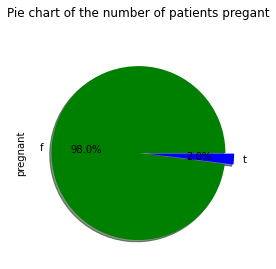

In [91]:
#pie chart for pregnant
df["pregnant"].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['green',"blue"], autopct='%1.1f%%')
plt.title("Pie chart of the number of patients pregant", y=1.1)
plt.show()

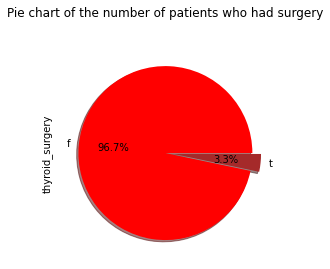

In [92]:
#pie chart for thyroid_surgery
df["thyroid_surgery"].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['red',"brown"], autopct='%1.1f%%')
plt.title("Pie chart of the number of patients who had surgery", y=1.1)
plt.show()

In [93]:
#Numerical variables

 #Measures of Central tendency
 #Mode
df.mean() 

age     51.555485
TSH      5.150354
T3       1.909042
TT4    108.468195
T4U      0.976772
FTI    114.741985
dtype: float64

In [94]:
#median
df.median()

age     54.00
TSH      0.70
T3       1.80
TT4    104.00
T4U      0.96
FTI    107.00
dtype: float64

In [95]:
#Mode
numerical_data=df[['age','TSH','T3','T4U','FTI','TT4']]
numerical_data.mode()

,age,TSH,T3,T4U,FTI,TT4
0,54.0,0.0,1.8,0.96,107.0,104.0


In [96]:
# Measures of dispersion
#standard deviation
df.std()

age    17.909384
TSH    22.137871
T3      0.882341
TT4    43.677305
T4U     0.217568
FTI    57.882814
dtype: float64

In [97]:
#kurtosis
df.kurt()

age     -0.621428
TSH    179.075313
T3      14.211499
TT4      7.846341
T4U      3.981455
FTI     51.540596
dtype: float64

In [98]:
#skewness
df.skew()

age    -0.241177
TSH    11.061752
T3      2.490112
TT4     1.595531
T4U     0.973771
FTI     5.339621
dtype: float64

In [99]:
# Quantiles
df.quantile([0.25,0.50,0.75])

,age,TSH,T3,TT4,T4U,FTI
0.25,38.0,0.0,1.5,85.0,0.86,92.0
0.50,54.0,0.7,1.8,104.0,0.96,107.0
0.75,64.0,1.8,2.2,124.0,1.05,126.0


In [100]:
# Range
numerical_data=df[['age','TSH','T3','T4U','FTI','TT4']]
max = numerical_data.max()
min = numerical_data.min()
range = max - min
range

age     97.00
TSH    530.00
T3      10.20
T4U      2.21
FTI    881.00
TT4    448.00
dtype: float64

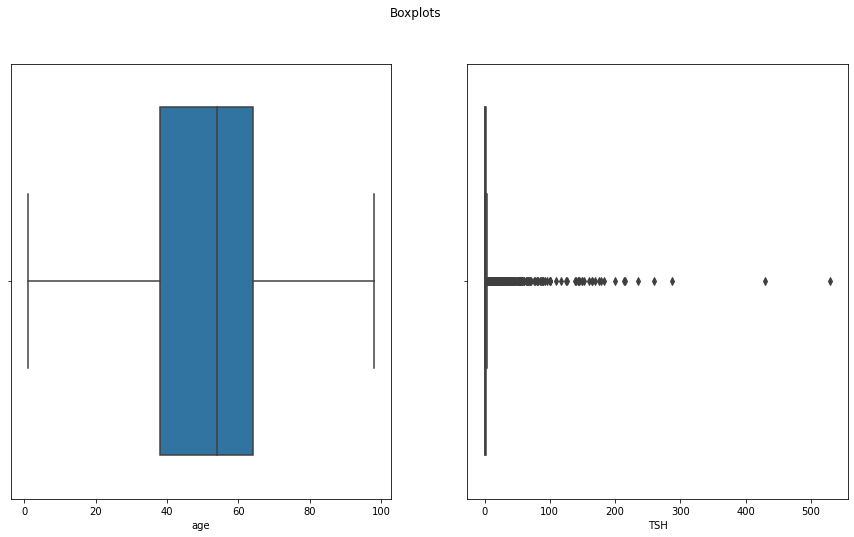

In [101]:
# Checking for outliers in the age,TSH column
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['age'], ax=axes[0])
sns.boxplot(df['TSH'], ax=axes[1])
plt.show()

We can conclude that there are outliers in our numerical columns but it would be irresponsible to drop them because it will distort our data and tamper with our analysis and predictions.

## Bivariate Analysis

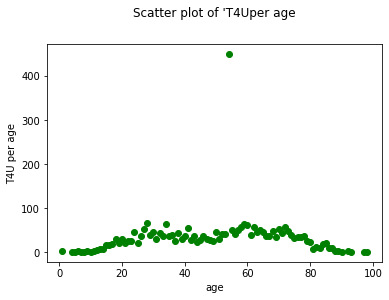

In [175]:
# Plotting our scatterplot FOR age against T4U

nc=df.groupby('age')['T4U'].sum().reset_index(name='T4Uper age')
nc
plt.scatter(nc["age"] , nc['T4Uper age'], c='g')
plt.xlabel("age")
plt.ylabel("T4U per age")
plt.title("Scatter plot of 'T4Uper age", y=1.1)
plt.show()
#we can see that as the age rises, the T4U increases but T4U starts to drop from age 65

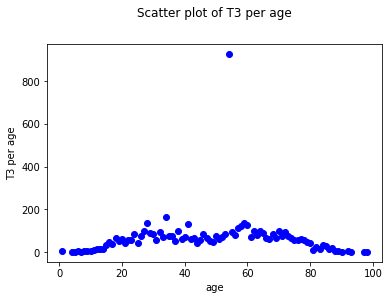

In [176]:
#scatter plot for age agaist T3
nc=df.groupby('age')['T3'].sum().reset_index(name='T3 per age')
nc
plt.scatter(nc["age"] , nc['T3 per age'], c='b')
plt.xlabel("age")
plt.ylabel('T3 per age')
plt.title("Scatter plot of T3 per age", y=1.1)
plt.show()
#we can see that as the age rises, the T3 increases but T4U starts to drop from age 65

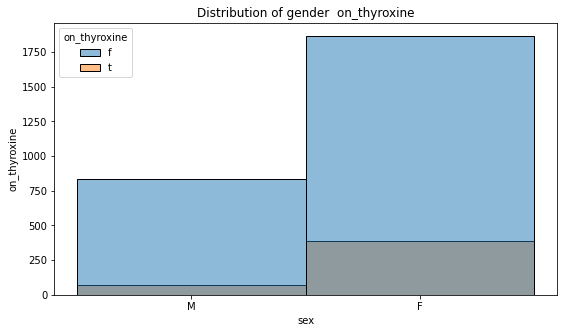

In [178]:
#Stacked column chart for sex agaist on_thyroxine
plt.figure(figsize=(9, 5))
sns.histplot(x = df["sex"], hue = df["on_thyroxine"])
plt.xlabel('sex')
plt.ylabel('on_thyroxine')
plt.title('Distribution of gender  on_thyroxine') 
plt.show()
#From the stacked column chart, we can see that there were more female patoents on_thyroxine 

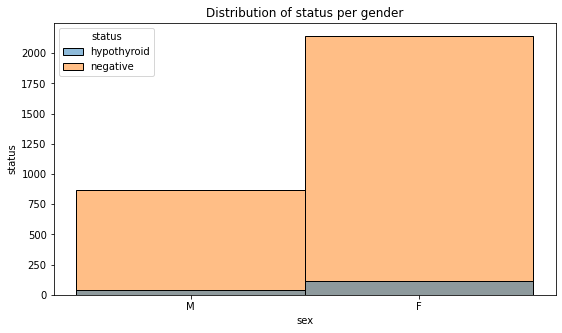

In [180]:
#stacked column chart for status agaist sex
plt.figure(figsize=(9, 5))
sns.histplot(x = df["sex"], hue = df["status"])
plt.xlabel("sex")
plt.ylabel('status')
plt.title('Distribution of status per gender') 
plt.show()
#from the chart we can see that most of the patients status was negative but 
#more females were diagnosed with hypothyroism compared to male patients

In [106]:
#frequecy table for sex vs on_antithyroid_medication
df[["sex","on_antithyroid_medication"]].value_counts(sort = False)

sex  on_antithyroid_medication
F    f                            2222
     t                              33
M    f                             899
     t                               9
dtype: int64

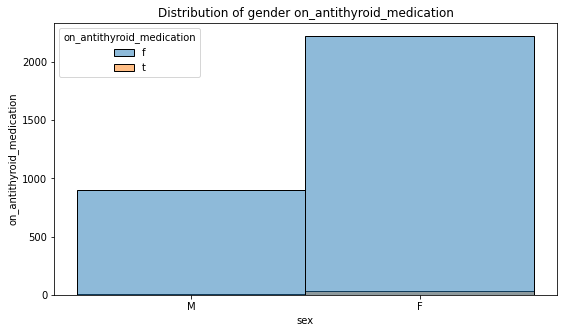

In [107]:
#Stacked column for sex vs patients on_antithyroid_medication
plt.figure(figsize=(9, 5))
sns.histplot(x = df["sex"], hue = df["on_antithyroid_medication"])
plt.xlabel('sex')
plt.ylabel('on_antithyroid_medication')
plt.title('Distribution of gender on_antithyroid_medication') 
plt.show()
#we can see that more female patients are on_antithyroid_medication compared to male patients

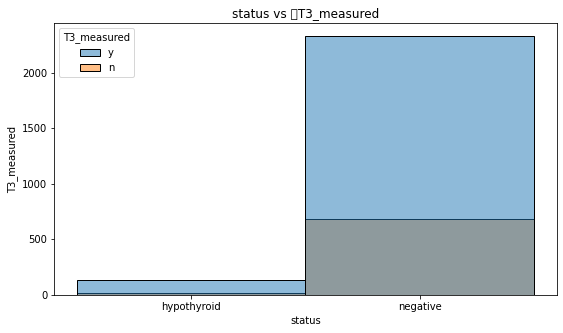

In [108]:
#stacked column for status vs T3_measured
plt.figure(figsize=(9, 5))
sns.histplot(x = df["status"], hue = df["T3_measured"])
plt.xlabel('T3_measured')
plt.ylabel('status')
plt.title('status vs 	T3_measured') 
plt.show()



In [109]:
# Z-test for age of the patients 
from scipy import stats
p_age= df['age']
age_zscore = stats.zscore(p_age)

print("The zscore for Respondents Age is:  n/",age_zscore)

The zscore for Respondents Age is:  n/ [ 1.14173367 -2.04145851 -1.53884922 ...  1.42096106  1.25342463
  0.24820604]


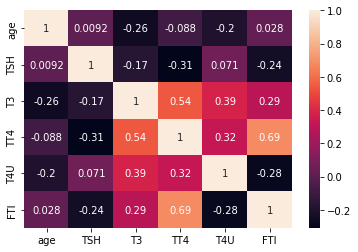

In [110]:
#correlation using heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

## 7. Implementing the Solution

In [111]:
# FEATURE ENGINEERING
# 
#installing category encoder
!pip install category_encoders

In [112]:
#start by creating a subset of numerical data so that I separate them from categorical data
df1 = df[['age','TSH','T3','TT4','T4U','FTI']]
df.drop(['age','TSH','T3','TT4','T4U','FTI'],axis=1,inplace=True)
# import category encoders

import category_encoders as ce

In [113]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(df.columns)
df = encoder.fit_transform(df)
df.head(2)

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [114]:
#concatinate the two tables
df2 = pd.concat([df,df1],axis=1)
#df2.head(4)
df2.shape

(3163, 24)

## Decision Trees

### Ada boosted trees

In [115]:
#Lets import libraries that we shall use
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#splitting data into features and target
X=df2.drop(["status"],1)
y=df2[["status"]].values

#splittig the data into train and test set
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
#lets Create a decision tree classifier
tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)
#checking the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 97.70750988142292


In [117]:
#Building our adaboost model
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=300, random_state=42)

# Train it on our training set.
ada_boost = ada_boost.fit(X_train, y_train)
#making predictions using our model
y_pred_ada = ada_boost.predict(X_test)
#checking the accuracy of our model
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada)*100)

Accuracy: 98.61660079051383


In [118]:
# We then use the confusion matrix to compare the number of correct predictions done by our model
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, y_pred_ada)
confusion

array([[  94,   20],
       [  15, 2401]])

### Gradient boosted trees

In [119]:
#Lets import libraries that we shall use
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#splitting data into features and target
X=df2.drop(["status"],1)
y=df2[["status"]].values

#splittig the data into train and test set
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [120]:
#gradient boosting
!sudo pip install scikit-learn


In [121]:
#importing the libraries to be used
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
#gradient boosting

model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5)
#training our model
model = model.fit(X_train, y_train)
#making preductions
y_pred_gbr = model.predict(X_test)

from sklearn.metrics import accuracy_score

#The accuracy of the model
print('GB Accuracy is  ', metrics.accuracy_score(y_test,y_pred_gbr)*100)

GB Accuracy is   98.14229249011858


In [135]:
# We then use the confusion matrix to compare the number of correct predictions done by our model
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, y_pred_gbr)
confusion

array([[ 100,   14],
       [  33, 2383]])

After analyzing the adaboost trees, its clear that the ada boosted tree has  the highest accuracy score as compared to the gradient boosted tree though the margin is not huge.

## 8. Support Vector Machines(SMV)

### Polynomial SVM

In [123]:
#splitting data into features and target
X=df2.drop(["status"],1)
y=df2[["status"]].values

#splittig the data into train and test set
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC(kernel='poly')
parameters=({"C":[0.1,10,100,1000],"degree":[3,4,5,6],"gamma":[0.1,0.01,0.001,0.0001]})

#used gridsearch cv to identify the best parameters
search=GridSearchCV(model,parameters)
search.fit(X_train, y_train)

#Get the best parameters
print(search.best_params_)

{'C': 10, 'degree': 4, 'gamma': 0.0001}


In [140]:
# Building a polynomial model 
polyclassifier = SVC(kernel='poly',degree=4,C=10, gamma=0.0001)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

#Making predictions
y_pred=polyclassifier.predict(X_test)

In [142]:
#model evalutaion
print("Accuracy is, ", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Accuracy is,  97.74703557312253
[[  94   20]
 [  37 2379]]


### Radial basis function (rbf)model

In [127]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
model = SVC(kernel='rbf')
parameters=({"C":[0.1,10,100,1000],"degree":[3,4,5,6],"gamma":[0.1,0.01,0.001,0.0001]})

#used gridsearch cv to identify the best parameters
search=GridSearchCV(model,parameters)
search.fit(X_train, y_train)

#Get the best parameters
print(search.best_params_)

{'C': 10, 'degree': 3, 'gamma': 0.0001}


In [147]:
# Building a polynomial model 
model_rbf= SVC(kernel='rbf',degree=3,C=10, gamma=0.0001)
# Training the model using the training set
model_rbf.fit(X_train, y_train)

#Making predictions
y_pred=model_rbf.predict(X_test)

In [144]:
# Model Evaluation
print("Accuracy is, ", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Accuracy is,  98.26086956521739
[[  94   20]
 [  24 2392]]


### Sigmoid model

In [131]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
model = SVC(kernel='sigmoid')
parameters=({"C":[0.1,10,100,1000],"degree":[3,4,5,6],"gamma":[0.1,0.01,0.001,0.0001]})

#used gridsearch cv to identify the best parameters
search=GridSearchCV(model,parameters)
search.fit(X_train, y_train)

#Get the best parameters
print(search.best_params_)

{'C': 0.1, 'degree': 3, 'gamma': 0.0001}


In [148]:
# Building a sigmoid model 
model_sig= SVC(kernel='sigmoid',degree=3,C=0.1, gamma=0.0001)
# Training the model using the training set
model_sig.fit(X_train, y_train)

#Making predictions
y_pred=model_sig.predict(X_test)

In [146]:
# Model Evaluation
print("Accuracy is, ", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

Accuracy is,  95.8102766798419
[[   8  106]
 [   0 2416]]


After analyzing all our support vector machines, its clear that the radial basis function gave us the highest accuracy score as compared to the other support vector classifiers followed by the polynomial function then sigmoid.

## Challanging the model

## Random Forest Tree

In [182]:
#splitting data into features and target
X=df2.drop(["status"],1)
y=df2[["status"]].values

from sklearn.model_selection import train_test_split

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [183]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers so we use 42

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

In [186]:
# We then use the confusion matrix to compare the number of correct predictions done by our model
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, y_pred)
confusion


array([[ 26,  13],
       [  5, 905]])

In [187]:
# We can also determine the model's prediction accuracy using the accuracy score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy of our random forest classifier is: ", accuracy*100)

The accuracy of our random forest classifier is:  98.10326659641728


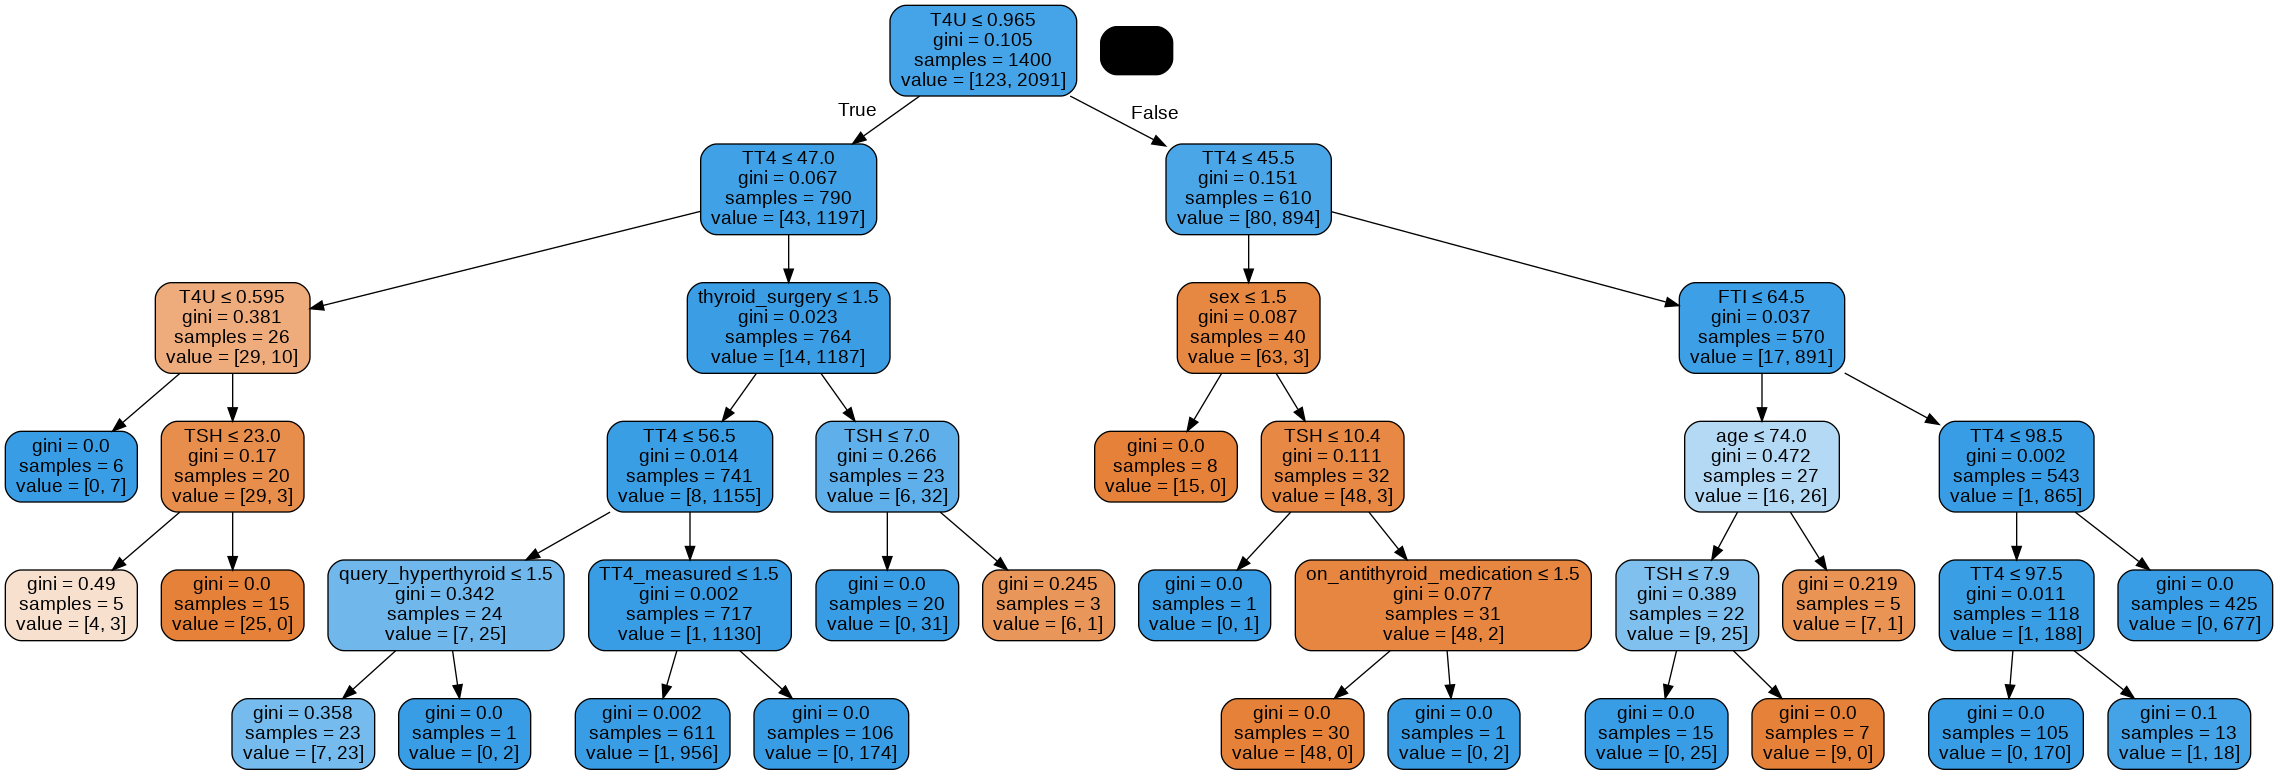

In [196]:
# We can then go ahead and visualize an individual tree within our forest
!pip install --upgrade scikit-learn==0.20.3
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# Pick a specific tree from the forest
tree = forest.estimators_[45]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

In [195]:
# Feature importance
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
# round(importance, 2) simply means rounding off the importance to 2 decimal places
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('T3_measured', 0.0), ('TT4_measured', 0.0), ('T4U_measured', 0.0), ('FTI_measured', 0.0), ('age', 0.02), ('TSH', 0.12), ('T3', 0.0), ('TT4', 0.72), ('T4U', 0.06), ('FTI', 0.05)]

Variable: TT4                  Importance: 0.72
Variable: TSH                  Importance: 0.12
Variable: T4U                  Importance: 0.06
Variable: FTI                  Importance: 0.05
Variable: on_antithyroid_medication Importance: 0.02
Variable: age                  Importance: 0.02
Variable: thyroid_surgery      Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hypothyroid    Importance:

Since we're trying to predict whether a patient has hypothyroidism or not, the only important features we need are :

Variable: TT4 

Variable: TSH   

Variable: T4U  

Variable: FTI  

     